Importing modules

In [43]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data Overview

In [44]:
data1=pd.read_csv("petrol.csv")
data=data1.set_index("Date")
data.head()

,Delhi,Kolkata,Mumbai,Chennai
Date,,,,
April 19 2018,74.07,76.77,81.92,76.84
April 18 2018,74.02,76.73,81.87,76.79
April 17 2018,74.02,76.73,81.87,76.79
April 16 2018,74.02,76.73,81.87,76.79
April 15 2018,73.98,76.69,81.83,76.75


# 1Preprocessing

###  Data Cleaning

In [45]:
data.isna().sum()

Delhi      0
Kolkata    0
Mumbai     0
Chennai    0
dtype: int64

In [46]:
data.describe()

,Delhi,Kolkata,Mumbai,Chennai
count,374.000000,374.000000,374.000000,374.000000
mean,68.582299,71.781872,76.686176,70.895348
std,3.800444,3.420669,3.989632,4.353440
min,56.490000,61.350000,62.750000,56.070000
25%,66.282500,69.452500,75.297500,68.080000
50%,69.265000,72.145000,77.230000,71.780000
75%,71.510000,74.350000,79.620000,74.167500
max,74.070000,81.430000,81.920000,76.930000


In [47]:
data.shape

(374, 4)

In [48]:
data[data.duplicated()]

,Delhi,Kolkata,Mumbai,Chennai
Date,,,,
April 17 2018,74.02,76.73,81.87,76.79
April 16 2018,74.02,76.73,81.87,76.79
April 11 2018,73.98,76.69,81.83,76.75
April 10 2018,73.98,76.69,81.83,76.75
April 06 2018,73.98,76.69,81.83,76.75
April 05 2018,73.98,76.69,81.83,76.75
April 03 2018,73.95,76.66,81.80,76.72
March 27 2018,72.90,75.63,80.77,75.61
March 20 2018,72.20,74.94,80.07,74.87


In [49]:
data.dtypes

Delhi      float64
Kolkata    float64
Mumbai     float64
Chennai    float64
dtype: object

###  Handling Outliers

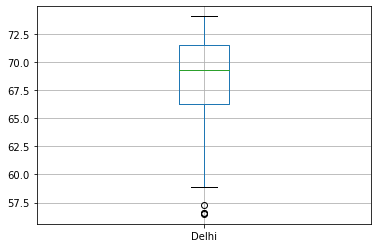

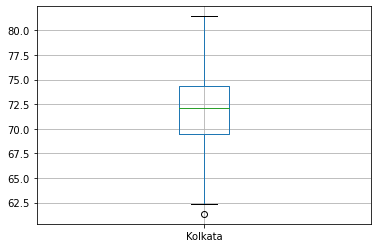

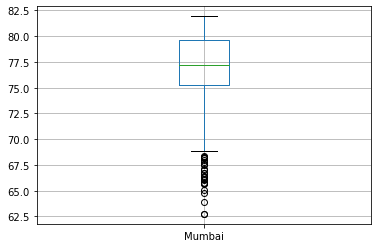

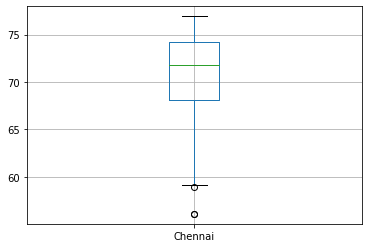

In [50]:
for columns in (data.dtypes[data.dtypes!='object'].index):
    plt.figure()
    data.boxplot([columns])

In [51]:
unknw=data.isin(['unknown']).sum()*(100/len(data))

In [52]:
unknw

Delhi      0.0
Kolkata    0.0
Mumbai     0.0
Chennai    0.0
dtype: float64

# 2 EDA

In [53]:

data_mean=data.mean()
data_mean


Delhi      68.582299
Kolkata    71.781872
Mumbai     76.686176
Chennai    70.895348
dtype: float64

array([[<AxesSubplot:title={'center':'Delhi'}>,
        <AxesSubplot:title={'center':'Kolkata'}>],
       [<AxesSubplot:title={'center':'Mumbai'}>,
        <AxesSubplot:title={'center':'Chennai'}>]], dtype=object)

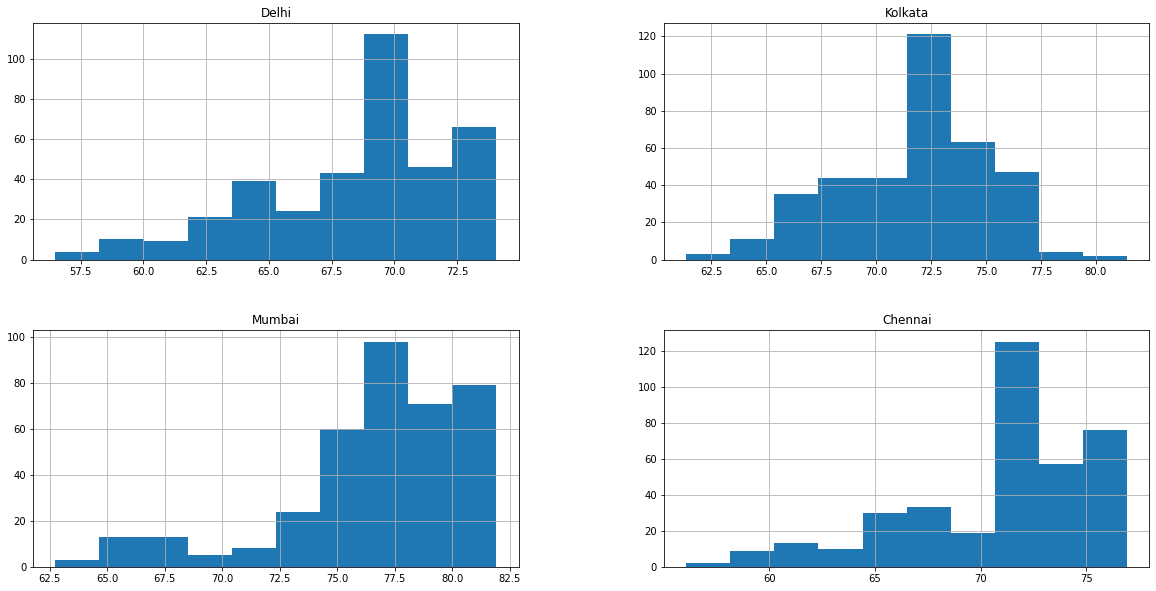

In [54]:

data.hist(figsize=(20,10))

### Yearwise Data

In [55]:

def getyear(year):
    return data1[data1["Date"].str.contains(year)]
for i in range(2014,2019):
    year=str(i)
    ds=getyear(year)
    print("Data From Year ",year,"\n")
    print(ds,"\n")
    


Data From Year  2014 

                 Date  Delhi  Kolkata  Mumbai  Chennai
362  December 16 2014  61.33    68.65   68.86    63.94
363  December 01 2014  63.33    70.73   70.95    66.05
364  November 01 2014  64.24    71.68   71.91    67.01
365   October 15 2014  66.65    74.21   74.46    69.59
366   October 01 2014  67.86    75.46   75.73    70.87
367    August 31 2014  68.51    76.14   76.41    71.55
368    August 15 2014  70.33    78.03   78.32    73.47
369    August 01 2014  72.51    80.30   80.60    75.78
370      July 01 2014  73.60    81.43   81.75    76.93
371      June 25 2014  71.56    79.42   80.16    74.76
372      June 07 2014  71.51    79.36   80.11    74.71
373      June 01 2014  71.51    79.36   80.11    74.71 

Data From Year  2015 

                  Date  Delhi  Kolkata  Mumbai  Chennai
344   December 16 2015  59.98    65.53   67.04    60.28
345   December 01 2015  60.48    65.93   67.55    60.80
346   November 16 2015  61.06    66.39   68.13    61.38
347   Novembe

In [56]:
data_2017=getyear('2017')
data_2017.mean()

Delhi      67.954879
Kolkata    70.785507
Mumbai     76.613961
Chennai    70.456232
dtype: float64

*.Delhi has the lowest price

*Mumbai has the highest price

<AxesSubplot:>

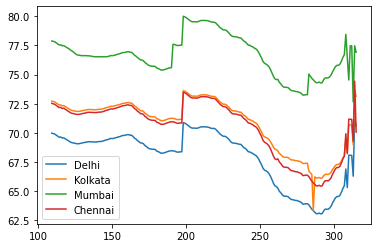

In [57]:
data_2017.plot()

In [58]:
data_2017.describe()

,Delhi,Kolkata,Mumbai,Chennai
count,207.000000,207.000000,207.000000,207.000000
mean,67.954879,70.785507,76.613961,70.456232
std,2.326304,2.221368,1.735657,2.364482
min,63.060000,63.330000,72.660000,65.440000
25%,66.285000,69.135000,75.510000,68.760000
50%,69.020000,71.780000,76.620000,71.510000
75%,69.575000,72.335000,77.565000,72.095000
max,71.140000,73.660000,79.990000,74.430000


# 3 Model Building

###  Splitting Data

In [181]:

data['MA3'] = data['Mumbai'].shift(1).rolling(window=3).mean()
data['MA9']= data['Mumbai'].shift(1).rolling(window=9).mean()

In [182]:
datan=data.dropna()

In [183]:
X=datan[['MA3','MA9']]
Y=datan['Mumbai']
training = 0.65
t = int(training*len(datan))
 #Training dataset
X_train = X[:t]
Y_train = Y[:t]

 #Testing dataset
X_test = X[t:]
Y_test = Y[t:]

### Linear Regression 

In [184]:

model = LinearRegression().fit(X_train,Y_train)

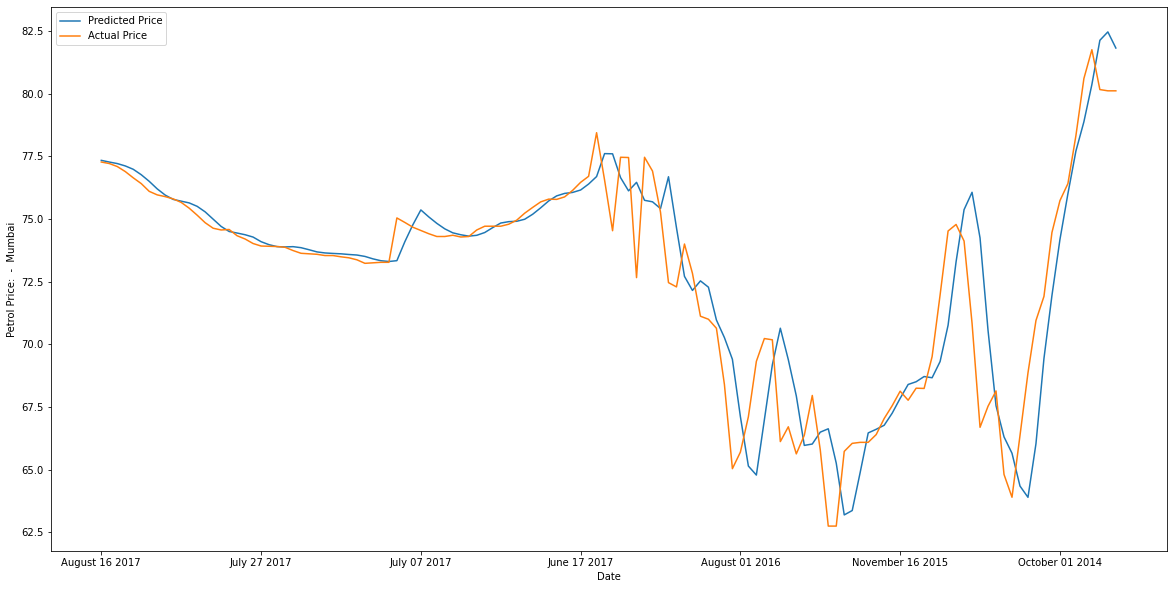

In [185]:
predicted_price = model.predict(X_test)
predicted_prices = pd.DataFrame(predicted_price,index=Y_test.index,columns = ['Price'])
predicted_prices.plot(figsize=(20,10))
Y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Petrol Price:  -  Mumbai")
plt.show()

In [186]:
print('Variance score: %.2f' % model.score(X_test, Y_test))

Variance score: 0.81


In [187]:
import math
sq_error = sum((predicted_price - Y_test)**2)
mean_sq_error = sq_error/len(predicted_price)
mean_sq_error

3.2571454442074224

In [188]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(predicted_price,Y_test)
print("MSE:",MSE)

MSE: 3.2571454442074232
